In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import argopy
import scipy.ndimage as filter
import cartopy.crs as ccrs
import cartopy
import xrft
import scipy
import matplotlib

In [3]:
import filt_funcs as ff
import EV_funcs as ef

# Load Boxes

In [16]:
s_ds=xr.open_dataset("202206/202206_lon:(25,45)_lat:(-60,-50).nc")
s = ff.get_ds_interp(so_ds,0,2000,4)

In [33]:
so1_ds = xr.open_dataset("202206/202206_lon:(120,130)_lat:(-60,-55).nc")
so1 = ff.get_ds_interp(so1_ds,0,2000,4)
so2_ds = xr.open_dataset("202206/202206_lon:(-180,-170)_lat:(-60,-55).nc")
so2 = ff.get_ds_interp(so2_ds,0,2000,4)
so3_ds = xr.open_dataset("202206/202206_lon:(-120,-110)_lat:(-60,-55).nc")
so3 = ff.get_ds_interp(so3_ds,0,2000,4)
so4_ds = xr.open_dataset("202206/202206_lon:(-60,-50)_lat:(-60,-55).nc")
so4 = ff.get_ds_interp(so4_ds,0,2000,4)
so5_ds = xr.open_dataset("202206/202206_lon:(0,10)_lat:(-60,-55).nc")
so5 = ff.get_ds_interp(so5_ds,0,2000,4)
so6_ds = xr.open_dataset("202206/202206_lon:(60,70)_lat:(-60,-55).nc")
so6 = ff.get_ds_interp(so6_ds,0,2000,4)

In [6]:
np_ds=xr.open_dataset("202206/202206_lon:(-155,-145)_lat:(30,35).nc")
np = ff.get_ds_interp(np_ds,0,2000,4)
na_ds=xr.open_dataset("202206/202206_lon:(-55,-45)_lat:(40,45).nc")
na = ff.get_ds_interp(na_ds,0,2000,4)
so_ds=xr.open_dataset("202206/202206_lon:(30,40)_lat:(-55,-50).nc")
so = ff.get_ds_interp(so_ds,0,2000,4)
io_ds=xr.open_dataset("202206/202206_lon:(90,100)_lat:(-15,-10).nc")
io = ff.get_ds_interp(io_ds,0,2000,4)

# Methods

# Results

### Temporal (argo_seasonality)

In [18]:
s1 = s.where(s.TIME.dt.month>0).where(s.TIME.dt.month<4)
s2 = s.where(s.TIME.dt.month>3).where(s.TIME.dt.month<7)
s3 = s.where(s.TIME.dt.month>6).where(s.TIME.dt.month<10)
s4 = s.where(s.TIME.dt.month>9).where(s.TIME.dt.month<13)

s1_SIG0_EV = ef.get_eddy_variance(s1,100,variable='SIG0')
s2_SIG0_EV = ef.get_eddy_variance(s2,100,variable='SIG0')
s3_SIG0_EV = ef.get_eddy_variance(s3,100,variable='SIG0')
s4_SIG0_EV = ef.get_eddy_variance(s4,100,variable='SIG0')

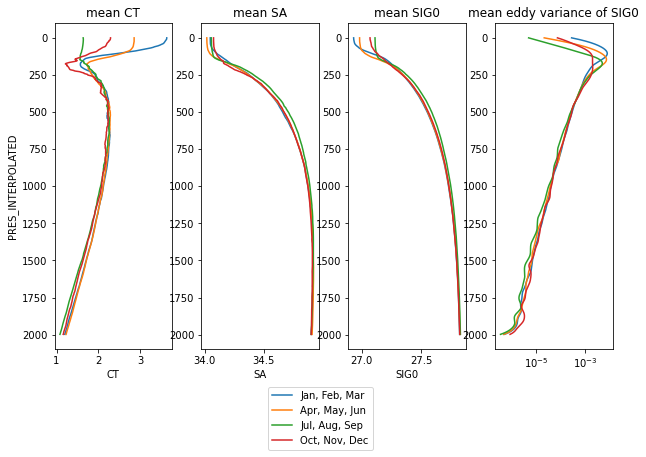

In [39]:
plt.figure(figsize=(10,6))

plt.subplot(1,4,1)
s1.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jan, Feb, Mar')
s2.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Apr, May, Jun')
s3.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jul, Aug, Sep')
s4.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Oct, Nov, Dec')
plt.gca().invert_yaxis()
plt.title('mean CT')

plt.subplot(1,4,2)
s1.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jan, Feb, Mar')
s2.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Apr, May, Jun')
s3.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jul, Aug, Sep')
s4.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Oct, Nov, Dec')
plt.gca().invert_yaxis()
plt.title('mean SA')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.5, -0.1))

plt.subplot(1,4,3)
s1.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jan, Feb, Mar')
s2.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Apr, May, Jun')
s3.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jul, Aug, Sep')
s4.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Oct, Nov, Dec')
plt.gca().invert_yaxis()
plt.title('mean SIG0')
plt.ylabel('')

plt.subplot(1,4,4)
s1_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jan, Feb, Mar')
s2_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Apr, May, Jun')
s3_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jul, Aug, Sep')
s4_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Oct, Nov, Dec')
plt.gca().invert_yaxis()
plt.title('mean eddy variance of SIG0')
plt.ylabel('')
plt.xscale('log')

plt.subplots_adjust(wspace=0.25)

#Is there a way to get rid of numbers on y scale but keep ticks? plt.yticks([]) turns both off

### Spatial Southern Ocean (argo_one_scale)

In [36]:
#need to renname regions based on their longitude

In [35]:
so1_SIG0_EV = ef.get_eddy_variance(so1, 100, variable='SIG0')
so2_SIG0_EV = ef.get_eddy_variance(so2, 100, variable='SIG0')
so3_SIG0_EV = ef.get_eddy_variance(so3, 100, variable='SIG0')
so4_SIG0_EV = ef.get_eddy_variance(so4, 100, variable='SIG0')
so5_SIG0_EV = ef.get_eddy_variance(so5, 100, variable='SIG0')
so6_SIG0_EV = ef.get_eddy_variance(so6, 100, variable='SIG0')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


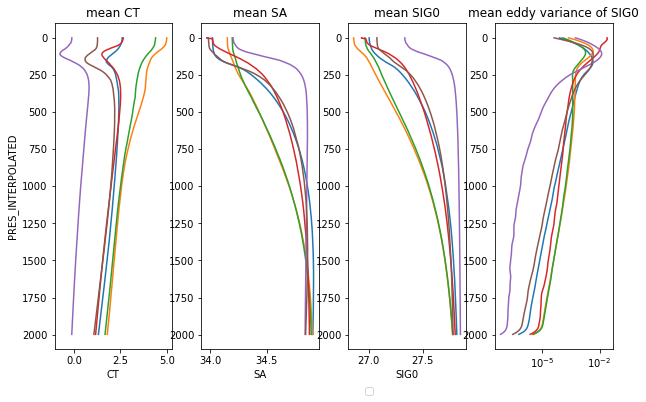

In [38]:
plt.figure(figsize=(10,6))

plt.subplot(1,4,1)
so1.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='')
so2.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='')
so3.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='')
so4.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='')
so5.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='')
so6.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='')
plt.gca().invert_yaxis()
plt.title('mean CT')

plt.subplot(1,4,2)
so1.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='')
so2.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='')
so3.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='')
so4.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='')
so5.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='')
so6.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='')
plt.gca().invert_yaxis()
plt.title('mean SA')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.5, -0.1))

plt.subplot(1,4,3)
so1.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='')
so2.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='')
so3.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='')
so4.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='')
so5.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='')
so6.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='')
plt.gca().invert_yaxis()
plt.title('mean SIG0')
plt.ylabel('')

plt.subplot(1,4,4)
so1_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='')
so2_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='')
so3_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='')
so4_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='')
so5_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='')
so6_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='')
plt.gca().invert_yaxis()
plt.title('mean eddy variance of SIG0')
plt.ylabel('')
plt.xscale('log')

plt.subplots_adjust(wspace=0.25)

### Spatial: Four Boxes (argo_one_scale)

In [34]:
np_SIG0_EV = ef.get_eddy_variance(np, 100, variable='SIG0')
na_SIG0_EV = ef.get_eddy_variance(na, 100, variable='SIG0')
so_SIG0_EV = ef.get_eddy_variance(so, 100, variable='SIG0')
io_SIG0_EV = ef.get_eddy_variance(io, 100, variable='SIG0')

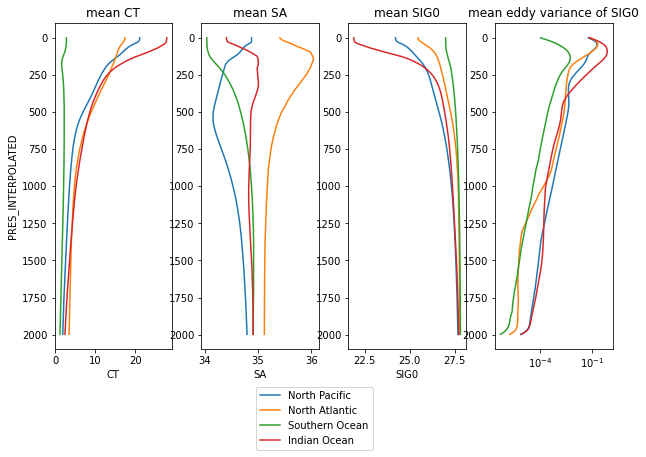

In [40]:
plt.figure(figsize=(10,6))

plt.subplot(1,4,1)
np.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Pacific')
na.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Atlantic')
so.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Southern Ocean')
io.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Indian Ocean')
plt.gca().invert_yaxis()
plt.title('mean CT')

plt.subplot(1,4,2)
np.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Pacific')
na.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Atlantic')
so.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Southern Ocean')
io.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Indian Ocean')
plt.gca().invert_yaxis()
plt.title('mean SA')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.5, -0.1))

plt.subplot(1,4,3)
np.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Pacific')
na.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Atlantic')
so.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Southern Ocean')
io.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Indian Ocean')
plt.gca().invert_yaxis()
plt.title('mean SIG0')
plt.ylabel('')

plt.subplot(1,4,4)
np_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Pacific')
na_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Atlantic')
so_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Southern Ocean')
io_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Indian Ocean')
plt.gca().invert_yaxis()
plt.title('mean eddy variance of SIG0')
plt.ylabel('')
plt.xscale('log')

plt.subplots_adjust(wspace=0.25)